In [1]:
import wooldridge as woo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy.stats import f, norm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.hp_filter import hpfilter
import statsmodels.api as sm
from wooldridge import data
from statsmodels.tsa.x13 import x13_arima_analysis
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import breaks_cusumolsresid
from scipy import stats
import ruptures as rpt

In [2]:
intdef = woo.dataWoo('intdef') ## Intdef dataframe
intdef

,year,i3,inf,rec,out,def,i3_1,inf_1,def_1,ci3,cinf,cdef,y77
0,1948,1.04,8.1,16.200001,11.600000,-4.600000,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1949,1.10,-1.2,14.500000,14.300000,-0.200000,1.04,8.1,-4.600000,0.060000,-9.3,4.400001,0
2,1950,1.22,1.3,14.400000,15.600000,1.200001,1.10,-1.2,-0.200000,0.120000,2.5,1.400001,0
3,1951,1.55,7.9,16.100000,14.200000,-1.900001,1.22,1.3,1.200001,0.330000,6.6,-3.100001,0
4,1952,1.77,1.9,19.000000,19.400000,0.400000,1.55,7.9,-1.900001,0.220000,-6.0,2.300000,0
5,1953,1.93,0.8,18.700001,20.400000,1.699999,1.77,1.9,0.400000,0.160000,-1.1,1.299999,0
6,1954,0.95,0.7,18.500000,18.799999,0.299999,1.93,0.8,1.699999,-0.980000,-0.1,-1.400000,0
7,1955,1.75,-0.4,16.500000,17.299999,0.799999,0.95,0.7,0.299999,0.800000,-1.1,0.500000,0
8,1956,2.66,1.5,17.500000,16.500000,-1.000000,1.75,-0.4,0.799999,0.910000,1.9,-1.799999,0
9,1957,3.27,3.3,17.700001,17.000000,-0.700001,2.66,1.5,-1.000000,0.610000,1.8,0.299999,0


In [3]:
# ARMA(1, 1):
# - First argument (1) is the AR (auto-regressive).
# - Second (1) is the MA (moving average).
modelARMA = ARIMA(intdef['inf'], order=(1, 0, 1))  # ARMA(1, 1)
resultsARMA = modelARMA.fit()
print(resultsARMA.summary())

                               SARIMAX Results                                
Dep. Variable:                    inf   No. Observations:                   56
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -116.110
Date:                Tue, 10 Jun 2025   AIC                            240.220
Time:                        16:46:39   BIC                            248.321
Sample:                             0   HQIC                           243.361
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0064      0.769      5.208      0.000       2.499       5.514
ar.L1          0.3186      0.122      2.621      0.009       0.080       0.557
ma.L1          0.8952      0.087     10.243      0.0

In [4]:
# AR(1):
##Stationary if coefficient lesser than 1
modelAR = ARIMA(intdef['inf'], order=(1, 0, 0))  # AR(1)
resultsAR = modelAR.fit()
print(resultsAR.summary())

                               SARIMAX Results                                
Dep. Variable:                    inf   No. Observations:                   56
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -123.901
Date:                Tue, 10 Jun 2025   AIC                            253.802
Time:                        16:46:39   BIC                            259.878
Sample:                             0   HQIC                           256.158
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9789      1.073      3.707      0.000       1.875       6.083
ar.L1          0.6852      0.103      6.676      0.000       0.484       0.886
sigma2         4.8349      0.619      7.816      0.0

In [5]:
# MA(1):
## always stationary
modelMA = ARIMA(intdef['inf'], order=(0, 0, 1))  # MA(1)
resultsMA = modelMA.fit()
print(resultsMA.summary())

                               SARIMAX Results                                
Dep. Variable:                    inf   No. Observations:                   56
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -118.604
Date:                Tue, 10 Jun 2025   AIC                            243.208
Time:                        16:46:39   BIC                            249.284
Sample:                             0   HQIC                           245.564
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9497      0.520      7.596      0.000       2.931       4.969
ma.L1          0.9381      0.076     12.378      0.000       0.790       1.087
sigma2         3.8966      0.597      6.523      0.0

In [6]:
## ACF
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

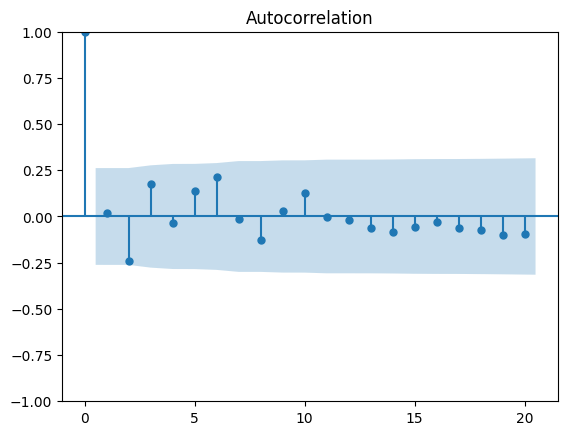

In [7]:
##AR - ploting ACF
residuosAR = resultsAR.resid
plot_acf(residuosAR, lags=20)
plt.show()

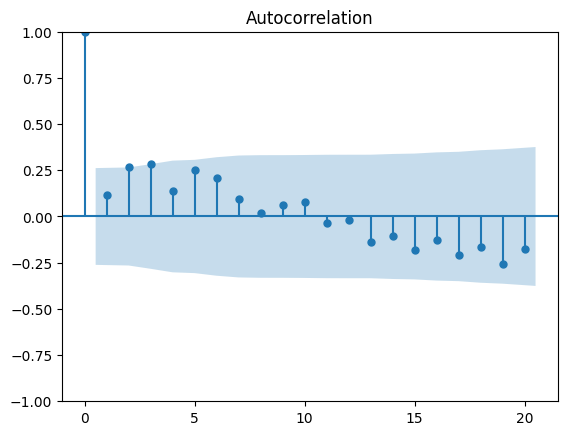

In [8]:
# MA - ploting ACF
residuosMA = resultsMA.resid
plot_acf(residuosMA, lags=20)
plt.show()

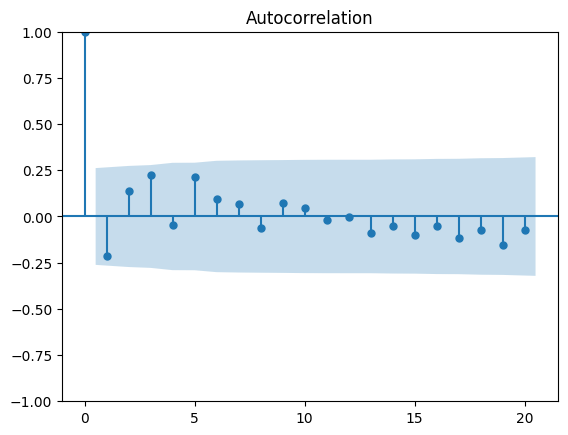

In [9]:
# ARMA - ploting ACF
residuosARMA = resultsARMA.resid
plot_acf(residuosARMA, lags=20)
plt.show()

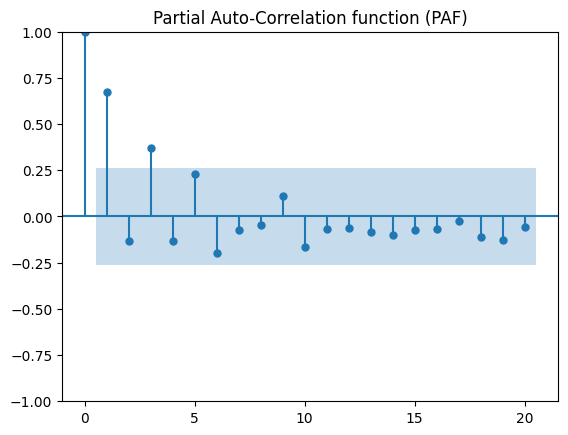

In [10]:
##PAF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(intdef['inf'], lags=20, method='ols') 
plt.title('Partial Auto-Correlation function (PAF)')
plt.show()

In [11]:
# Function to forecast
def forecast(model, steps=1):
    if hasattr(model, 'forecast'):
        # Use the forecast method for ARIMA models
        predictions = model.forecast(steps=steps)
    else:
        raise ValueError("Unsuported model. Use ARIMA (AR/MA/ARMA).")

    return predictions

# AR(1)
modelAR = ARIMA(intdef['inf'], order=(1, 0, 0))  # AR(1)
resultsAR = modelAR.fit()
print(resultsAR.summary())

# MA(1)
modelMA = ARIMA(intdef['inf'], order=(0, 0, 1))  # MA(1)
resultsMA = modelMA.fit()
print(resultsMA.summary())

# ARMA(1, 1)
modelARMA = ARIMA(intdef['inf'], order=(1, 0, 1))  # ARMA(1, 1)
resultsARMA = modelARMA.fit()
print(resultsARMA.summary())

# Forecasts
forecastAR = forecast(resultsAR, steps=5)
print("Forecast AR:", forecastAR)

forecastMA = forecast(resultsMA, steps=5)
print("Forecast MA:", forecastMA)

forecastARMA = forecast(resultsARMA, steps=5)
print("Forecast ARMA:", forecastARMA)

                               SARIMAX Results                                
Dep. Variable:                    inf   No. Observations:                   56
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -123.901
Date:                Tue, 10 Jun 2025   AIC                            253.802
Time:                        16:46:39   BIC                            259.878
Sample:                             0   HQIC                           256.158
                                 - 56                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9789      1.073      3.707      0.000       1.875       6.083
ar.L1          0.6852      0.103      6.676      0.000       0.484       0.886
sigma2         4.8349      0.619      7.816      0.0

In [12]:
## Forecast Evaluation

In [13]:
##Select from smalest MSPE

# Select inf
ts_data = intdef['inf'].dropna()  

# Divide between trainign and testing data
train_size = int(len(ts_data) * 0.8)
train, test = ts_data[:train_size], ts_data[train_size:]

# Function to evalute models ARIMA (AR, MA, ARMA)
def evaluate_arima_model(train, test, ar_order, ma_order):
    model = ARIMA(train, order=(ar_order, 0, ma_order))  # ARIMA(p, d=0, q)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    mse = mean_squared_error(test, predictions)
    return mse

# Function to get predictions
def get_arima_predictions(train, test, ar_order, ma_order):
    model = ARIMA(train, order=(ar_order, 0, ma_order))  # ARIMA(p, d=0, q)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    return predictions


# Avaliate different models
models = [
    (1, 0),  # AR(1)
    (0, 1),  # MA(1)
    (1, 1),  # ARMA(1,1)
    (2, 1),  # ARMA(2,1)
    (1, 2),  # ARMA(1,2)
]

results = {}
for ar_order, ma_order in models:
    mse = evaluate_arima_model(train, test, ar_order, ma_order)
    results[f'ARMA({ar_order},{ma_order})'] = mse

# Show the results
for model, mse in results.items():
    print(f'{model}: MSE = {mse:.4f}')

# Pick lesser MSE
best_model = min(results, key=results.get)
print(f'\nBest model: {best_model} com MSE = {results[best_model]:.4f}')

ARMA(1,0): MSE = 3.6352
ARMA(0,1): MSE = 3.3237
ARMA(1,1): MSE = 3.4672
ARMA(2,1): MSE = 3.5015
ARMA(1,2): MSE = 3.4503

Best model: ARMA(0,1) com MSE = 3.3237


c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [14]:
# Calcular os MSPEs para cada modelo
mspes = {
    'AR(1)': evaluate_arima_model(train, test, 1, 0),
    'MA(1)': evaluate_arima_model(train, test, 0, 1),
    'ARMA(1,1)': evaluate_arima_model(train, test, 1, 1),
    'ARMA(2,1)': evaluate_arima_model(train, test, 2, 1),
    'ARMA(1,2)': evaluate_arima_model(train, test, 1, 2),
}

# Função para realizar o teste F
def f_test(mspes, model1, model2):
    # Obter os MSPEs dos dois modelos
    mspe1 = mspes[model1]
    mspe2 = mspes[model2]
    
    # Calcular a estatística F
    if mspe1 > mspe2:
        F_stat = mspe1 / mspe2
        df1 = len(test)  # Graus de liberdade do numerador
        df2 = len(test)  # Graus de liberdade do denominador
    else:
        F_stat = mspe2 / mspe1
        df1 = len(test)  # Graus de liberdade do numerador
        df2 = len(test)  # Graus de liberdade do denominador
    
    # Calcular o p-valor
    p_value = 1 - f.cdf(F_stat, df1, df2)
    
    return F_stat, p_value

# Comparações entre modelos
comparisons = [
    ('AR(1)', 'MA(1)'),  # Comparação entre AR(1) e MA(1)
    ('MA(1)', 'ARMA(1,1)'),  # Comparação entre MA(1) e ARMA(1,1)
    ('ARMA(1,1)', 'ARMA(2,1)'),  # Comparação entre ARMA(1,1) e ARMA(2,1)
]

# Realizar os testes F
for model1, model2 in comparisons:
    F_stat, p_value = f_test(mspes, model1, model2)
    print(f'Teste F entre {model1} e {model2}:')
    print(f'  Estatística F = {F_stat:.4f}')
    print(f'  p-valor = {p_value:.4f}')
    if p_value < 0.05:
        print(f'  Conclusão: Há diferença significativa entre {model1} e {model2} (p < 0.05).')
    else:
        print(f'  Conclusão: Não há diferença significativa entre {model1} e {model2} (p >= 0.05).')
    print()

c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Teste F entre AR(1) e MA(1):
  Estatística F = 1.0937
  p-valor = 0.4396
  Conclusão: Não há diferença significativa entre AR(1) e MA(1) (p >= 0.05).

Teste F entre MA(1) e ARMA(1,1):
  Estatística F = 1.0432
  p-valor = 0.4714
  Conclusão: Não há diferença significativa entre MA(1) e ARMA(1,1) (p >= 0.05).

Teste F entre ARMA(1,1) e ARMA(2,1):
  Estatística F = 1.0099
  p-valor = 0.4933
  Conclusão: Não há diferença significativa entre ARMA(1,1) e ARMA(2,1) (p >= 0.05).



In [15]:
# Diebold-Mariano test function
def diebold_mariano_test(actual, forecast1, forecast2, h=1, crit="MSE"):
    # Convert inputs to numpy arrays
    actual = np.asarray(actual)
    forecast1 = np.asarray(forecast1)
    forecast2 = np.asarray(forecast2)
    
    # Calculate loss differential based on criterion
    if crit.upper() == "MSE":
        # Squared error loss
        d = (actual - forecast1)**2 - (actual - forecast2)**2
    elif crit.upper() == "MAD":
        # Absolute error loss
        d = np.abs(actual - forecast1) - np.abs(actual - forecast2)
    else:
        raise ValueError("crit must be either 'MSE' or 'MAD'")
    
    # Mean of loss differential
    d_bar = np.mean(d)
    
    # Autocovariance of loss differential at various lags
    n = len(d)
    gamma = []
    for k in range(h):
        gamma.append(np.sum((d[:n-k] - d_bar) * (d[k:] - d_bar)) / n)
    
    # Long-run variance of loss differential
    variance = gamma[0] + 2 * sum(gamma[1:])
    
    # DM test statistic
    dm_stat = d_bar / np.sqrt(variance / n)
    
    # p-value from Student's t distribution with (n-1) degrees of freedom
    p_value = 2 * (1 - stats.t.cdf(abs(dm_stat), df=n-1))
    
    # Test conclusion
    alpha = 0.05  # significance level
    if p_value < alpha:
        if dm_stat > 0:
            conclusion = f"Reject H0: Forecast 2 is significantly better than Forecast 1 (p={p_value:.4f})"
        else:
            conclusion = f"Reject H0: Forecast 1 is significantly better than Forecast 2 (p={p_value:.4f})"
    else:
        conclusion = f"Cannot reject H0: No significant difference between forecasts (p={p_value:.4f})"
    
    return dm_stat, p_value, conclusion

# Now get predictions for Diebold-Mariano test
model_predictions = {}
for ar_order, ma_order in models:
    model_name = f'ARMA({ar_order},{ma_order})'
    predictions = get_arima_predictions(train, test, ar_order, ma_order)
    model_predictions[model_name] = predictions

# Perform Diebold-Mariano tests comparing all models against the best model
print("\nDiebold-Mariano Test Results (comparing against the best model):")
for model in results.keys():
    if model != best_model:
        dm_stat, p_value, conclusion = diebold_mariano_test(
            test,
            model_predictions[best_model],
            model_predictions[model]
        )
        print(f"\n{best_model} vs {model}:")
        print(f"DM Statistic: {dm_stat:.4f}")
        print(f"p-value: {p_value:.4f}")
        print(f"Conclusion: {conclusion}")

# Create a comparison matrix of all models against each other
print("\nDiebold-Mariano Test Comparison Matrix:")
model_names = list(results.keys())
dm_matrix = pd.DataFrame(index=model_names, columns=model_names)

for i, model1 in enumerate(model_names):
    for j, model2 in enumerate(model_names):
        if i != j:
            dm_stat, p_value, _ = diebold_mariano_test(
                test,
                model_predictions[model1],
                model_predictions[model2]
            )
            # A positive DM statistic means model1 is worse than model2
            if dm_stat > 0:
                better_model = model2
            else:
                better_model = model1
                
            if p_value < 0.05:
                dm_matrix.loc[model1, model2] = f"{dm_stat:.2f}* ({better_model})"
            else:
                dm_matrix.loc[model1, model2] = f"{dm_stat:.2f} (p={p_value:.3f})"
        else:
            dm_matrix.loc[model1, model2] = "-"

print(dm_matrix)

c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Diebold-Mariano Test Results (comparing against the best model):

ARMA(0,1) vs ARMA(1,0):
DM Statistic: -3.9751
p-value: 0.0022
Conclusion: Reject H0: Forecast 1 is significantly better than Forecast 2 (p=0.0022)

ARMA(0,1) vs ARMA(1,1):
DM Statistic: -2.8024
p-value: 0.0172
Conclusion: Reject H0: Forecast 1 is significantly better than Forecast 2 (p=0.0172)

ARMA(0,1) vs ARMA(2,1):
DM Statistic: -3.0270
p-value: 0.0115
Conclusion: Reject H0: Forecast 1 is significantly better than Forecast 2 (p=0.0115)

ARMA(0,1) vs ARMA(1,2):
DM Statistic: -5.1514
p-value: 0.0003
Conclusion: Reject H0: Forecast 1 is significantly better than Forecast 2 (p=0.0003)

Diebold-Mariano Test Comparison Matrix:
                    ARMA(1,0)          ARMA(0,1)           ARMA(1,1)  \
ARMA(1,0)                   -  3.98* (ARMA(0,1))      2.03 (p=0.067)   
ARMA(0,1)  -3.98* (ARMA(0,1))                  -  -2.80* (ARMA(0,1))   
ARMA(1,1)     -2.03 (p=0.067)  2.80* (ARMA(0,1))                   -   
ARMA(2,1)    

In [16]:
##seasonality

In [17]:
# Load the CONSUMP dataset from wooldridge package
consump = woo.data('consump')

# Convert the data to a time series with quarterly frequency
consump['date'] = pd.date_range(start='1947-01-01', periods=len(consump), freq='Q')
consump = consump.set_index('date')

C:\Users\daves\AppData\Local\Temp\ipykernel_22204\3879268718.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  consump['date'] = pd.date_range(start='1947-01-01', periods=len(consump), freq='Q')


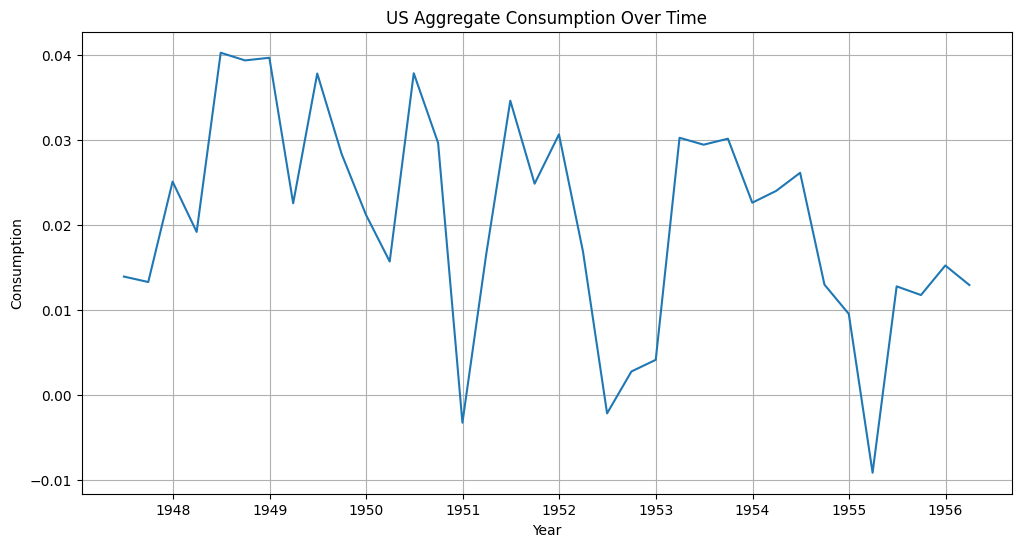

In [18]:
# Plot consumption over time to visualize seasonality
plt.figure(figsize=(12, 6))
plt.plot(consump.index, consump['gc'])
plt.title('US Aggregate Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.grid(True)

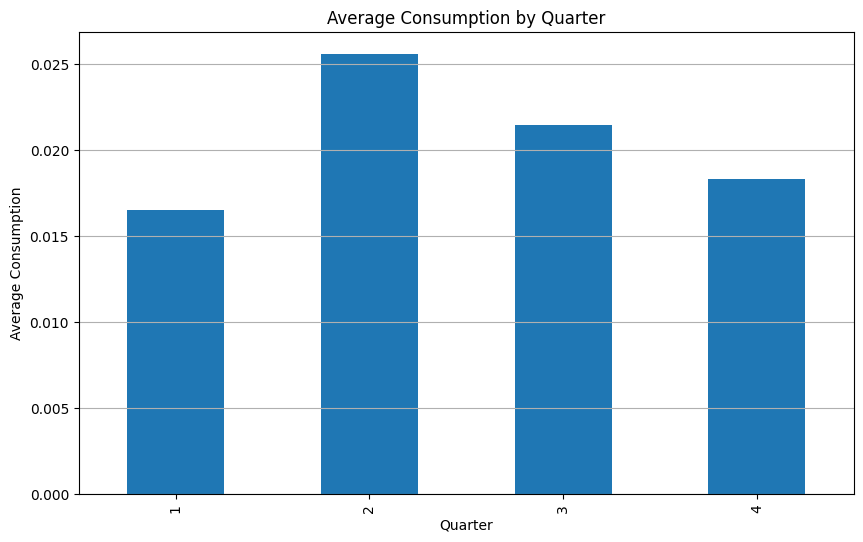

In [19]:
# To more clearly see the seasonality, let's create a seasonal plot
# Extracting the quarter from the index
consump['quarter'] = consump.index.quarter

# Group by year and quarter and calculate the mean
seasonal_data = consump.groupby(['quarter'])['gc'].mean()

plt.figure(figsize=(10, 6))
seasonal_data.plot(kind='bar')
plt.title('Average Consumption by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Consumption')
plt.grid(axis='y')

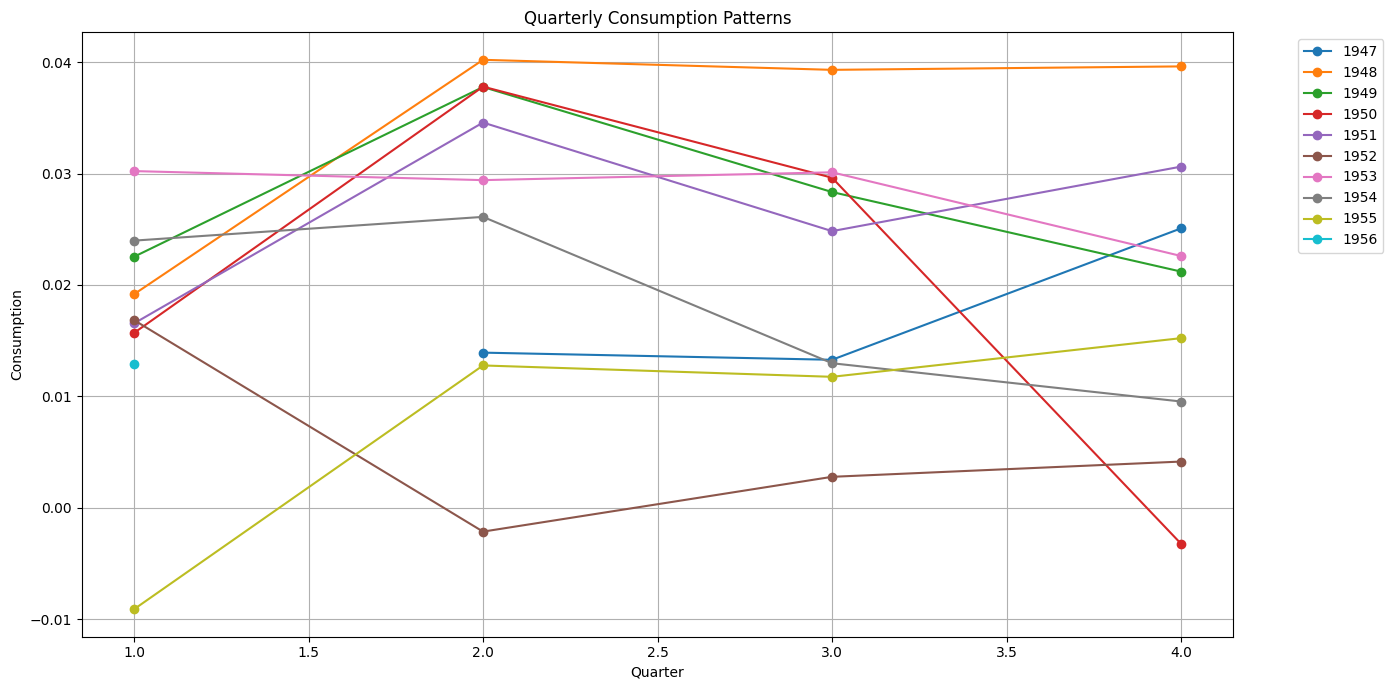

In [20]:
# Check for seasonality with a more detailed visualization
plt.figure(figsize=(14, 7))
years = consump.index.year.unique()
for year in years[0:10]:  # Just plot the first 10 years for clarity
    data_year = consump[consump.index.year == year]
    plt.plot(data_year['quarter'], data_year['gc'], marker='o', label=str(year))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Quarterly Consumption Patterns')
plt.xlabel('Quarter')
plt.ylabel('Consumption')
plt.grid(True)
plt.tight_layout()

In [21]:
# Variable 'gc'
previousgc = consump['gc']

# Drop missing values
gc = previousgc.dropna()

In [22]:
##Removing seasonality

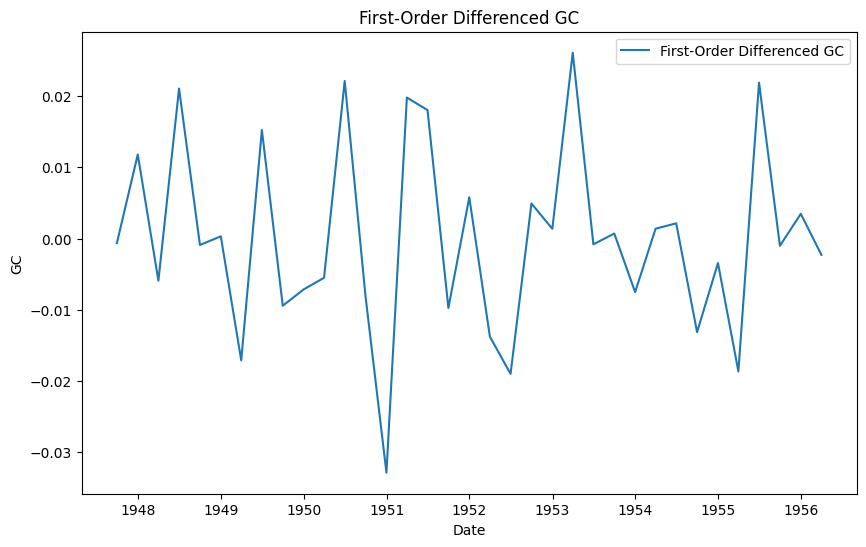

ADF Statistic: -5.405132287488641
p-value: 3.3041372789556083e-06


In [23]:
# 1. Differencing Method
#First-order differencing
gc_diff = gc.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(gc_diff, label='First-Order Differenced GC')
plt.title('First-Order Differenced GC')
plt.xlabel('Date')
plt.ylabel('GC')
plt.legend()
plt.show()

# Augmented Dickey-Fuller test to check stationarity
adf_result = adfuller(gc_diff)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

<Figure size 1200x800 with 0 Axes>

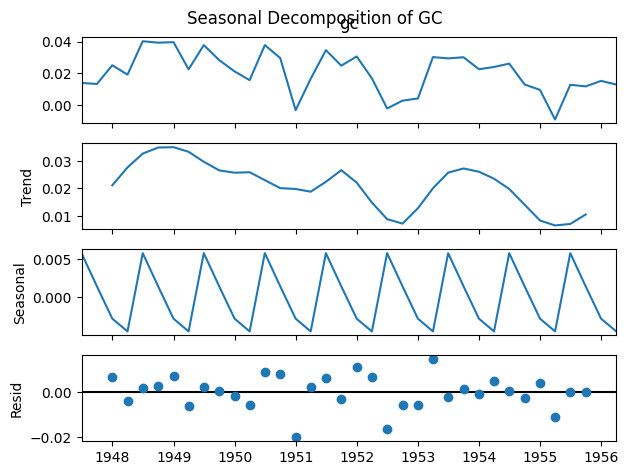

In [24]:
##2.  Seasonal Decomposition
# Seasonal decomposition using additive model
decomposition = seasonal_decompose(gc, model='additive', period=4)

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of GC')
plt.show()

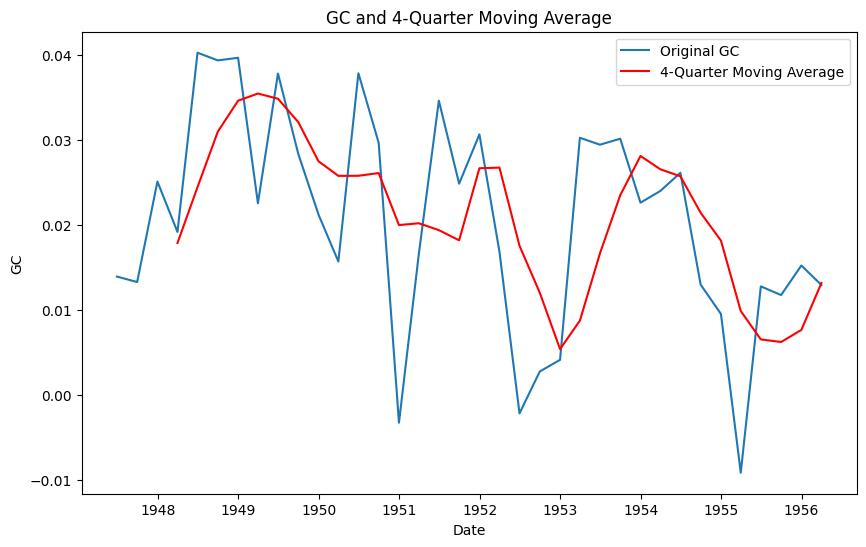

In [25]:
##3. Moving Average Method
# Calculate the 4-quarter moving average
gc_ma = gc.rolling(window=4).mean()

# Plot the original and moving average series
plt.figure(figsize=(10, 6))
plt.plot(gc, label='Original GC')
plt.plot(gc_ma, label='4-Quarter Moving Average', color='red')
plt.title('GC and 4-Quarter Moving Average')
plt.xlabel('Date')
plt.ylabel('GC')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                     gc   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 10 Jun 2025   Prob (F-statistic):                nan
Time:                        16:46:41   Log-Likelihood:                    nan
No. Observations:                  37   AIC:                               nan
Df Residuals:                      33   BIC:                               nan
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

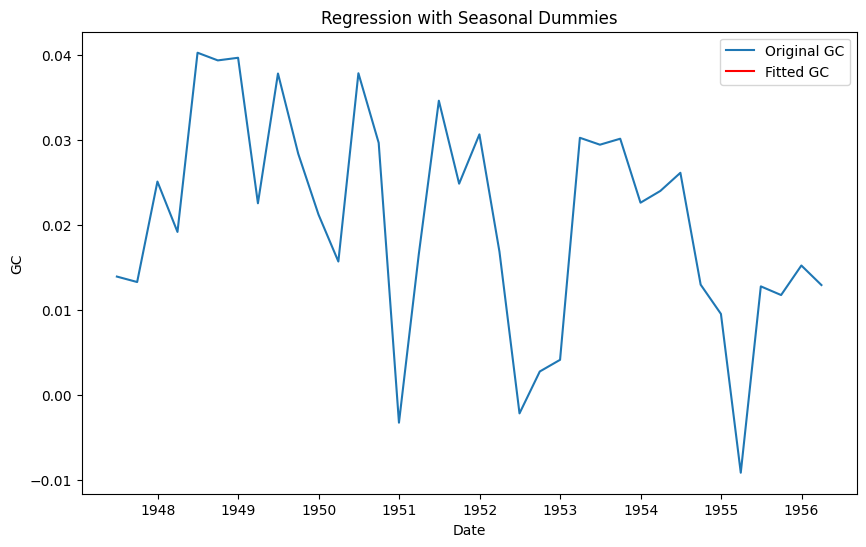

In [26]:
##4 Regression with Seasonal Dummies
# Create seasonal dummy variables
consump['quarter'] = consump.index.quarter
dummies = pd.get_dummies(consump['quarter'], prefix='Q', drop_first=True)

# Add dummies to the dataset
consump = pd.concat([consump, dummies], axis=1)

# Fit a linear regression model with seasonal dummies
X = consump[['Q_2', 'Q_3', 'Q_4']]  # Q1 is the reference category
# Convert boolean columns to integers
X = X.astype(int)
X = sm.add_constant(X)  # Add a constant term
y = consump['gc']

model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Plot the fitted values
plt.figure(figsize=(10, 6))
plt.plot(consump.index, y, label='Original GC')
plt.plot(consump.index, model.fittedvalues, label='Fitted GC', color='red')
plt.title('Regression with Seasonal Dummies')
plt.xlabel('Date')
plt.ylabel('GC')
plt.legend()
plt.show()

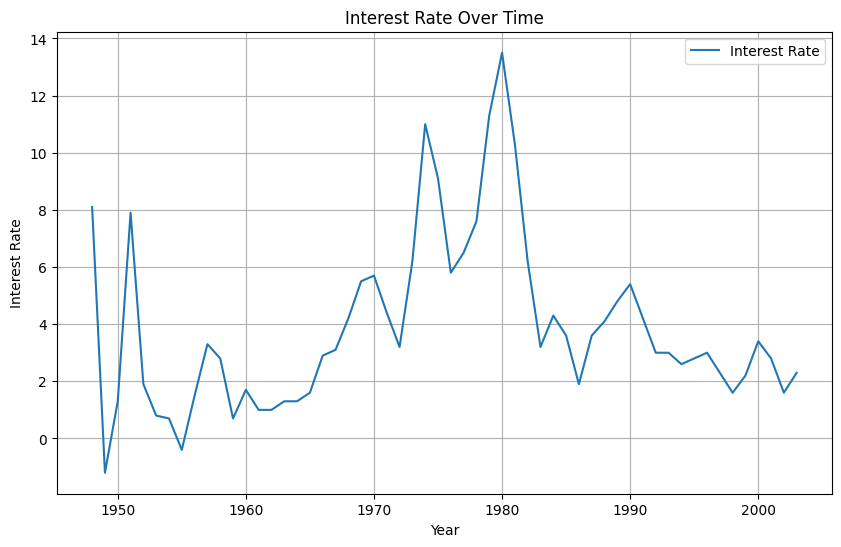

In [27]:
##Structural changes
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(intdef['year'], intdef['inf'], label='Interest Rate')
plt.title('Interest Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.legend()
plt.grid(True)
plt.show()

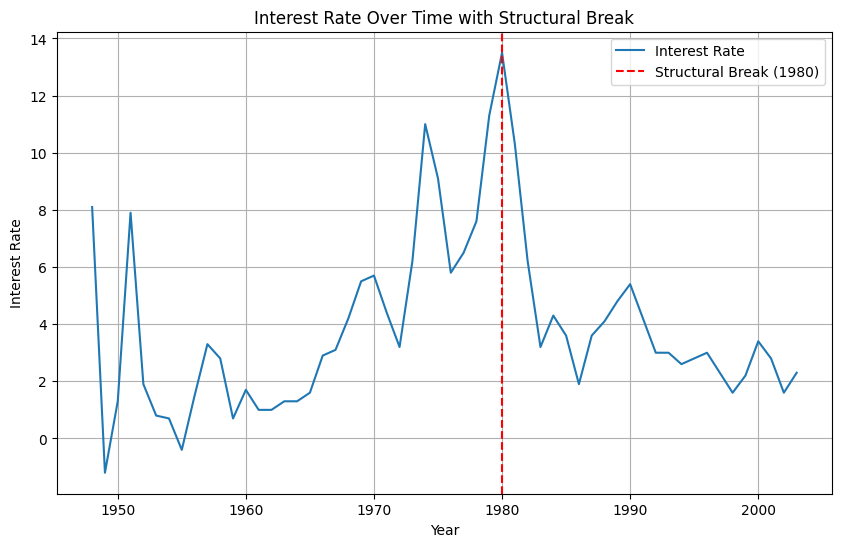

In [28]:
# Example: Structural break in the year 1980
break_year = 1980

plt.figure(figsize=(10, 6))
plt.plot(intdef['year'], intdef['inf'], label='Interest Rate')
plt.axvline(x=break_year, color='red', linestyle='--', label='Structural Break (1980)')
plt.title('Interest Rate Over Time with Structural Break')
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
#Chow test

#Break year
break_year = 1960

# Reset the index to access the 'year' as a column
intdef.reset_index(inplace=True)

# Create a time index for the dataset
intdef['year'] = intdef['year'].astype(int)
intdef.set_index('year', inplace=True)

# Split the dataset into two subsets: before and after the breakpoint
before_break = intdef.loc[:break_year]
after_break = intdef.loc[break_year + 1:]

# Fit the ARMA(0,1) model for the entire dataset
full_model = ARIMA(intdef['inf'], order=(0, 0, 1)).fit()

# Fit the ARMA(0,1) model for the subset before the breakpoint
before_model = ARIMA(before_break['inf'], order=(0, 0, 1)).fit()

# Fit the ARMA(0,1) model for the subset after the breakpoint
after_model = ARIMA(after_break['inf'], order=(0, 0, 1)).fit()

# Calculate the residual sum of squares (RSS) for each model
rss_full = np.sum(full_model.resid**2)
rss_before = np.sum(before_model.resid**2)
rss_after = np.sum(after_model.resid**2)

# Number of parameters in the ARMA(0,1) model (1 parameter for MA(1))
k = 1

# Number of observations
n = len(intdef)
n1 = len(before_break)
n2 = len(after_break)

# Chow test statistic
chow_numerator = (rss_full - (rss_before + rss_after)) / k
chow_denominator = (rss_before + rss_after) / (n1 + n2 - 2 * k)
chow_stat = chow_numerator / chow_denominator

# P-value for the Chow test
p_value = 1 - f.cdf(chow_stat, k, n1 + n2 - 2 * k)

# Print the results
print(f"Chow Test Statistic: {chow_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a structural break at the specified breakpoint.")
else:
    print("Fail to reject the null hypothesis: No structural break detected.")

Chow Test Statistic: 7.2455988452507185
P-value: 0.009443174093376805
Reject the null hypothesis: There is a structural break at the specified breakpoint.


c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib

In [30]:
##CUSUM test

# Fit the ARMA(0,1) model to the 'inf' variable
arma_model = ARIMA(intdef['inf'], order=(0, 0, 1)).fit()

# Get the residuals from the ARMA model
residuals = arma_model.resid

# Perform the CUSUM test
cusum_stat, p_value, crit_values = breaks_cusumolsresid(residuals)

# Print the p-value
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a structural break.")
else:
    print("Fail to reject the null hypothesis: No structural break detected.")

P-value: 0.07113912169990444
Fail to reject the null hypothesis: No structural break detected.


c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [31]:
intdef

,index,i3,inf,rec,out,def,i3_1,inf_1,def_1,ci3,cinf,cdef,y77
year,,,,,,,,,,,,,
1948,0,1.04,8.1,16.200001,11.600000,-4.600000,NaN,NaN,NaN,NaN,NaN,NaN,0
1949,1,1.10,-1.2,14.500000,14.300000,-0.200000,1.04,8.1,-4.600000,0.060000,-9.3,4.400001,0
1950,2,1.22,1.3,14.400000,15.600000,1.200001,1.10,-1.2,-0.200000,0.120000,2.5,1.400001,0
1951,3,1.55,7.9,16.100000,14.200000,-1.900001,1.22,1.3,1.200001,0.330000,6.6,-3.100001,0
1952,4,1.77,1.9,19.000000,19.400000,0.400000,1.55,7.9,-1.900001,0.220000,-6.0,2.300000,0
1953,5,1.93,0.8,18.700001,20.400000,1.699999,1.77,1.9,0.400000,0.160000,-1.1,1.299999,0
1954,6,0.95,0.7,18.500000,18.799999,0.299999,1.93,0.8,1.699999,-0.980000,-0.1,-1.400000,0
1955,7,1.75,-0.4,16.500000,17.299999,0.799999,0.95,0.7,0.299999,0.800000,-1.1,0.500000,0
1956,8,2.66,1.5,17.500000,16.500000,-1.000000,1.75,-0.4,0.799999,0.910000,1.9,-1.799999,0


In [32]:
# Reset the index to make 'year' a column
intdef = intdef.reset_index()

# Set another column as the index, if needed
intdef = intdef.set_index('index')  # Uncomment and replace 'index_col' with the actual column name
intdef

,year,i3,inf,rec,out,def,i3_1,inf_1,def_1,ci3,cinf,cdef,y77
index,,,,,,,,,,,,,
0,1948,1.04,8.1,16.200001,11.600000,-4.600000,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1949,1.10,-1.2,14.500000,14.300000,-0.200000,1.04,8.1,-4.600000,0.060000,-9.3,4.400001,0
2,1950,1.22,1.3,14.400000,15.600000,1.200001,1.10,-1.2,-0.200000,0.120000,2.5,1.400001,0
3,1951,1.55,7.9,16.100000,14.200000,-1.900001,1.22,1.3,1.200001,0.330000,6.6,-3.100001,0
4,1952,1.77,1.9,19.000000,19.400000,0.400000,1.55,7.9,-1.900001,0.220000,-6.0,2.300000,0
5,1953,1.93,0.8,18.700001,20.400000,1.699999,1.77,1.9,0.400000,0.160000,-1.1,1.299999,0
6,1954,0.95,0.7,18.500000,18.799999,0.299999,1.93,0.8,1.699999,-0.980000,-0.1,-1.400000,0
7,1955,1.75,-0.4,16.500000,17.299999,0.799999,0.95,0.7,0.299999,0.800000,-1.1,0.500000,0
8,1956,2.66,1.5,17.500000,16.500000,-1.000000,1.75,-0.4,0.799999,0.910000,1.9,-1.799999,0


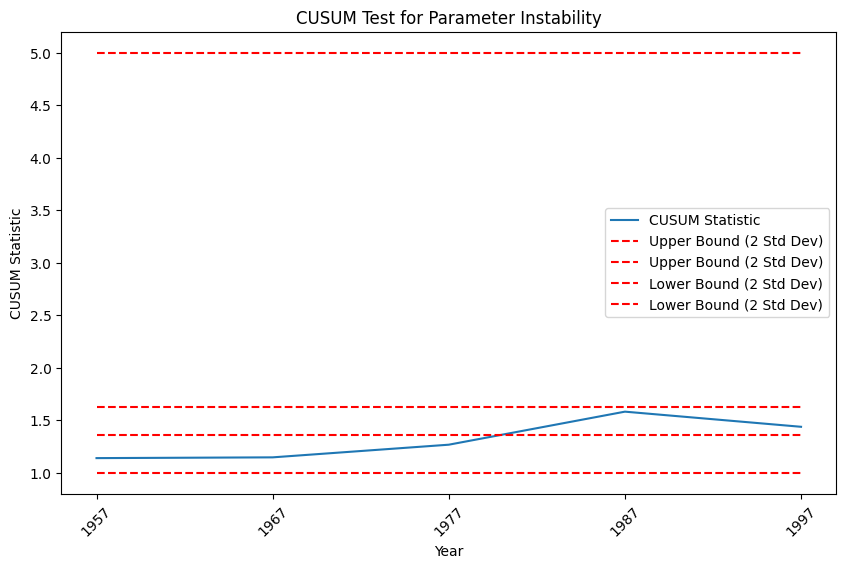

In [33]:
# Initialize lists to store CUSUM statistics and critical values
cusum_stats = []
upper_bounds = []
lower_bounds = []
years_list = []

# Loop over different window sizes
for i in range(10, len(intdef) + 1, 10):
    # Fit the ARMA(0,1) model to the 'inf' variable with i observations
    arma_model = ARIMA(intdef['inf'][:i], order=(0, 0, 1)).fit()
    
    # Get the residuals from the ARMA model
    residuals = arma_model.resid
    
    # Perform the CUSUM test
    cusum_stat, p_value, crit_values = breaks_cusumolsresid(residuals)
    
    # Store the CUSUM statistic and critical values
    cusum_stats.append(cusum_stat)
    upper_bounds.append(crit_values[1])
    lower_bounds.append(crit_values[0])
    years_list.append(intdef['year'].iloc[i-1]) # Access the 'year' column directly

# Plot the CUSUM statistics with two standard deviations
plt.figure(figsize=(10, 6))
plt.plot(years_list, cusum_stats, label='CUSUM Statistic')
plt.plot(years_list, upper_bounds, 'r--', label='Upper Bound (2 Std Dev)')
plt.plot(years_list, lower_bounds, 'r--', label='Lower Bound (2 Std Dev)')
plt.xlabel('Year')
plt.ylabel('CUSUM Statistic')
plt.title('CUSUM Test for Parameter Instability')
plt.legend()

# Set the x-ticks to the year values
plt.xticks(years_list, rotation=45)
plt.show()

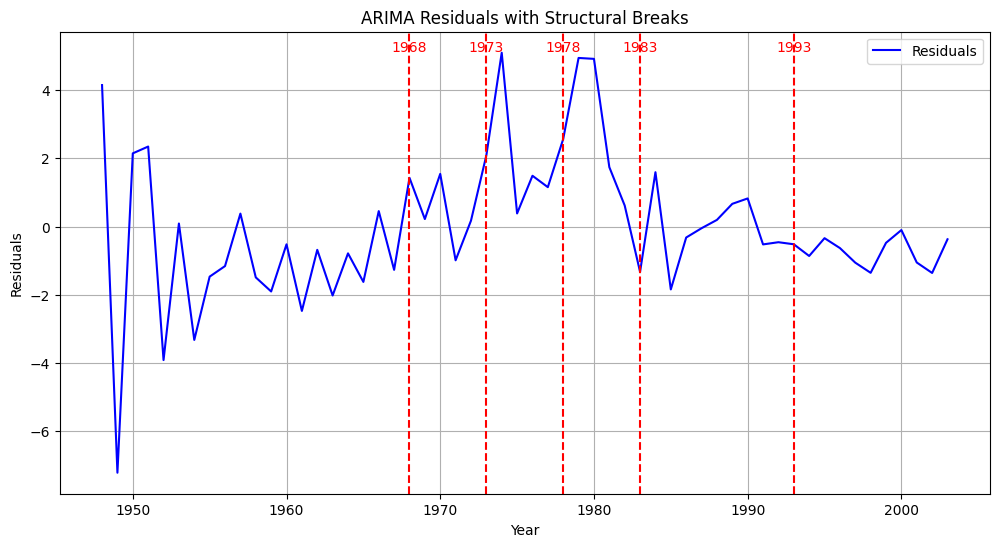

In [34]:
##Bai Peron test
# ARIMA model
arma_bp = ARIMA(intdef['inf'], order=(0, 0, 1)).fit()

# Extract residuals from the ARIMA model
residuals = arma_bp.resid

# Convert pandas Series to numpy array
residuals_array = residuals.values

# Initialize the Binseg algorithm
algo = rpt.Binseg(model="l2").fit(residuals_array)

# Detect breakpoints
breakpoints = algo.predict(n_bkps=5)  # Adjust n_bkps as needed

# Create a custom plot instead of using rpt.display
plt.figure(figsize=(12, 6))

# Plot the residuals
plt.plot(intdef['year'], residuals, 'b-', label='Residuals')

# Mark the breakpoints with vertical lines
for bp in breakpoints[:-1]:  # Exclude the last breakpoint which is the end of the series
    year_at_breakpoint = intdef['year'].iloc[bp]
    plt.axvline(x=year_at_breakpoint, color='r', linestyle='--')
    plt.text(year_at_breakpoint, plt.ylim()[1]*0.9, f"{year_at_breakpoint}", 
             horizontalalignment='center', color='r')

plt.xlabel('Year')
plt.ylabel('Residuals')
plt.title('ARIMA Residuals with Structural Breaks')
plt.legend()
plt.grid(True)
plt.show()